<a href="https://colab.research.google.com/github/Deepthi-AJ/-ABOUT-ME-UPLOADS-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('diab.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


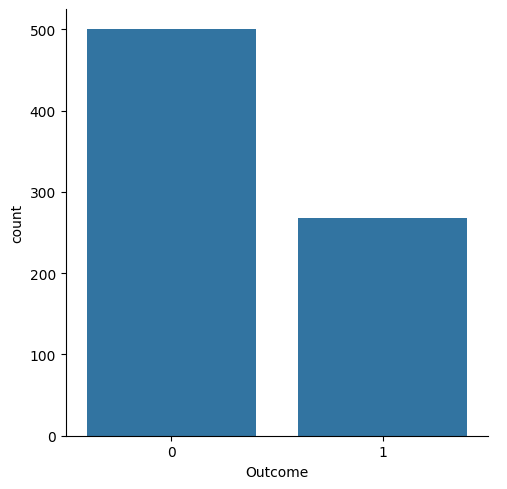

In [ ]:
# Number of values for each quality
# We use catplot in seaborn for this
sns.catplot(x='Outcome', data=dataset,kind='count')

<Axes: >

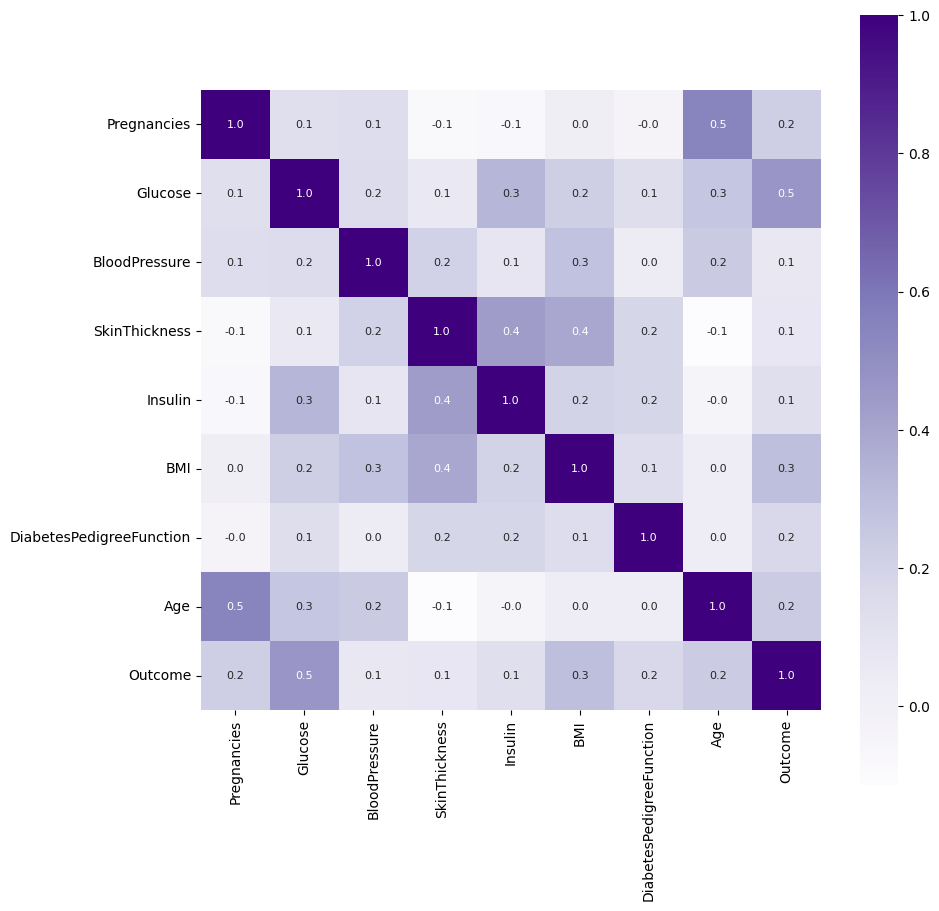

In [ ]:
# We can view the correlation of these features using a heatmap
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')

In [ ]:
# Separate features and labels
X = dataset.drop('Outcome',axis=1)
Y=dataset['Outcome']

In [ ]:
# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(f'Training Accuracy: {training_data_accuracy:.02f}')

Training Accuracy: 0.82


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(f'Testing Accuracy: {test_data_accuracy:.02f}')

Testing Accuracy: 0.74


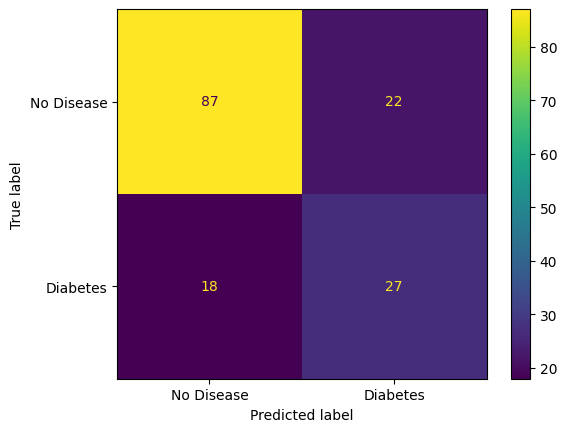

In [ ]:
cm = metrics.confusion_matrix(Y_test,X_test_prediction)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Disease','Diabetes'])
disp.plot()

In [ ]:
print(metrics.classification_report(Y_test,X_test_prediction  ))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.55      0.60      0.57        45

    accuracy                           0.74       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.75      0.74      0.74       154

